In [1]:
import shap
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer


In [2]:
# Load the fetal health dataset
file_path = 'Fetal Health Database/fetal_health.csv'
fetal_health_data = pd.read_csv(file_path)

# Adjust the target variable to start from 0
fetal_health_data['fetal_health'] = fetal_health_data['fetal_health'] - 1

# Split the data into features (X) and target variable (y)
X = fetal_health_data.drop('fetal_health', axis=1)
y = fetal_health_data['fetal_health']

# Split the data into training and testing sets
test_size = 0.2
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)

# Standardize the features (mean=0 and variance=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the training set
print("Preprocessed Training Set:")
print(X_train_scaled)

# Display the testing set
print("Preprocessed Testing Set:")
print(X_test_scaled)

Preprocessed Training Set:
[[-0.81890715 -0.82497568 -0.20426125 ... -0.74290279 -0.58051372
  -0.51669716]
 [ 0.69242905 -0.82497568 -0.20426125 ...  0.28143057 -0.54596417
  -0.51669716]
 [-1.12117438 -0.82497568 -0.20426125 ... -1.15263613 -0.54596417
  -0.51669716]
 ...
 [-1.12117438  0.46404882 -0.20426125 ... -0.81119168  0.42142321
  -0.51669716]
 [-1.82646461 -0.05156098 -0.20426125 ... -0.60632501  0.9051169
  -0.51669716]
 [ 0.89394054 -0.56717078 -0.20426125 ...  0.7594528  -0.51141462
   1.11902941]]
Preprocessed Testing Set:
[[-0.01286117 -0.30936588  0.00273972 ...  0.00827501 -0.33866688
  -0.51669716]
 [-0.81890715 -0.82497568 -0.18356116 ... -0.87948057  0.35232411
   1.11902941]
 [-0.21437267  0.20624392 -0.14216096 ... -0.40145834  0.07592772
  -0.51669716]
 ...
 [ 1.09545203  0.72185372 -0.10076077 ...  0.89603058 -0.30411733
   1.11902941]
 [ 0.28940606 -0.82497568 -0.14216096 ... -0.12830277 -0.58051372
   1.11902941]
 [ 1.09545203 -0.30936588 -0.20426125 ...  1.6

In [3]:
fetal_health_data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,1.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,1.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,1.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,1.0


In [4]:
# Create and train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=random_seed)
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       333
         1.0       0.89      0.77      0.82        64
         2.0       1.00      0.97      0.98        29

    accuracy                           0.95       426
   macro avg       0.95      0.90      0.92       426
weighted avg       0.95      0.95      0.95       426

Accuracy: 0.9483568075117371


In [5]:

# Define the LIME explainer
explainer_lime = LimeTabularExplainer(X_train_scaled, feature_names=X.columns, class_names=['Normal', 'Suspect', 'Pathological'], discretize_continuous=True, mode='classification')

# Select a sample instance for explanation (you can change the index)
sample_index = 26
sample_instance = X_test_scaled[sample_index]

# Get the true class for the selected instance
true_class = int(y_test.iloc[sample_index])

# Get the actual class label names
class_labels = ['Normal', 'Suspect', 'Pathological']
actual_class = class_labels[true_class]

# Explain the model's prediction using LIME
lime_explanation = explainer_lime.explain_instance(sample_instance, rf_classifier.predict_proba, num_features=len(X.columns), top_labels=3)

# Get the predicted probabilities for each class
predicted_probabilities = rf_classifier.predict_proba(sample_instance.reshape(1, -1))

# Get the predicted class label
predicted_class = class_labels[np.argmax(predicted_probabilities)]

# Print actual and predicted values
print(f"Actual Class: {actual_class}")
print(f"Predicted Class: {predicted_class}")

# Display the LIME explanation for each class graphically
lime_explanation.show_in_notebook(show_table=True, show_all=False)

Actual Class: Pathological
Predicted Class: Pathological


In [6]:

# Define the LIME explainer
explainer_lime = LimeTabularExplainer(X_train_scaled, feature_names=list(range(X_train_scaled.shape[1])), class_names=['Normal', 'Suspect', 'Pathological'], discretize_continuous=True, mode='classification')

# Explain the model's prediction using LIME
lime_explanation = explainer_lime.explain_instance(sample_instance, rf_classifier.predict_proba, num_features=len(X.columns), top_labels=3)

# Print actual and predicted values
print(f"Actual Class: {actual_class}")
print(f"Predicted Class: {predicted_class}")

# Display the LIME explanation for each class graphically
lime_explanation.show_in_notebook(show_table=True, show_all=False)

Actual Class: Pathological
Predicted Class: Pathological


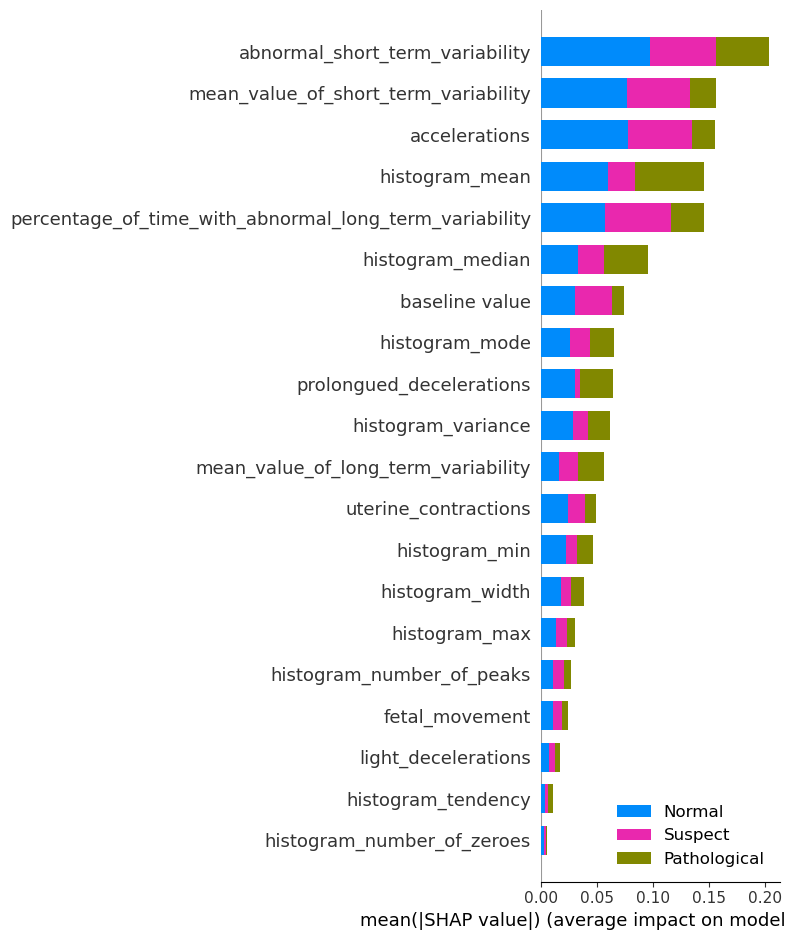

In [7]:
# Create a SHAP explainer
explainer_shap = shap.TreeExplainer(rf_classifier)

# Transform the test data for compatibility with the SHAP explainer
X_test_transformed = X_test_scaled.astype(np.float32)  

# Calculate SHAP values
shap_values = explainer_shap.shap_values(X_test_transformed)

# Visualize the SHAP summary plot for all classes
shap.summary_plot(shap_values, X_test_transformed, feature_names=X.columns, class_names=['Normal', 'Suspect', 'Pathological'])


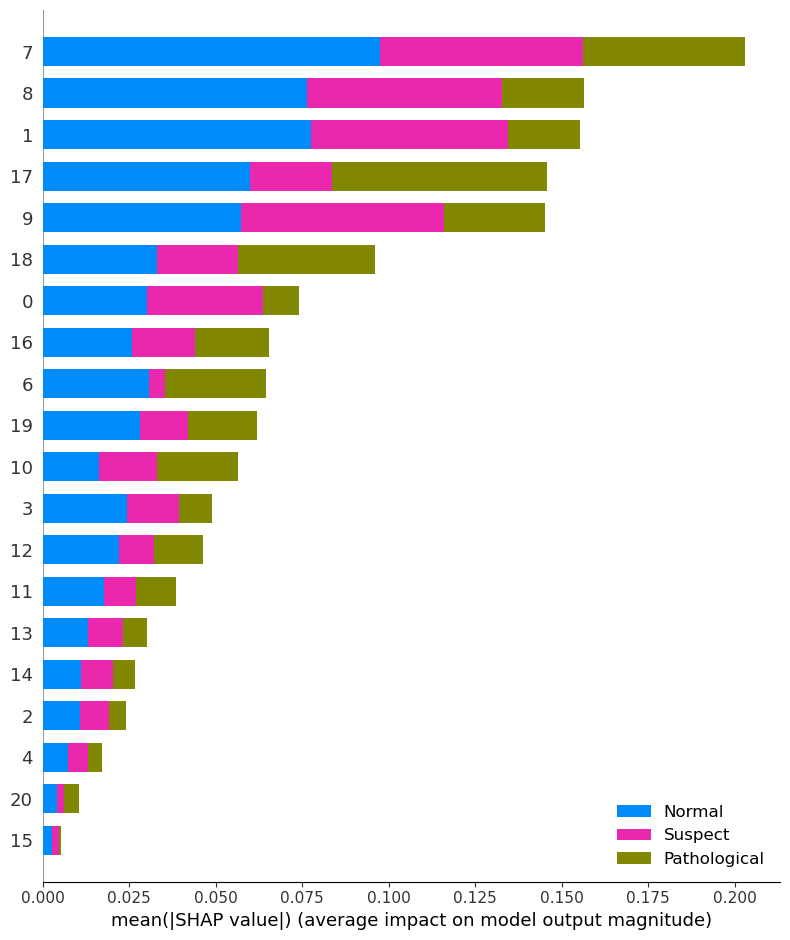

In [8]:
# Visualize the SHAP summary plot for all classes
shap.summary_plot(shap_values, X_test_transformed, feature_names=list(range(X_train_scaled.shape[1])), class_names=['Normal', 'Suspect', 'Pathological'])


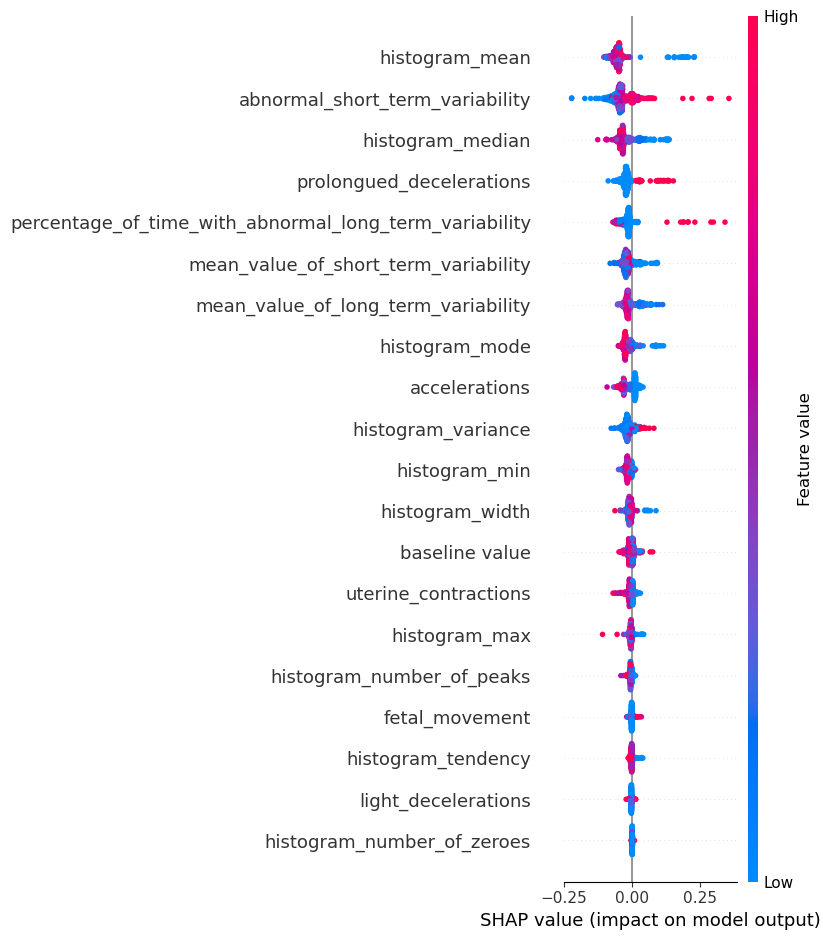

In [9]:
# Choose a specific class index (adjust class_idx as needed)
class_idx = true_class # Example: Suspect
shap.summary_plot(shap_values[class_idx], X_test_transformed, feature_names=X.columns)

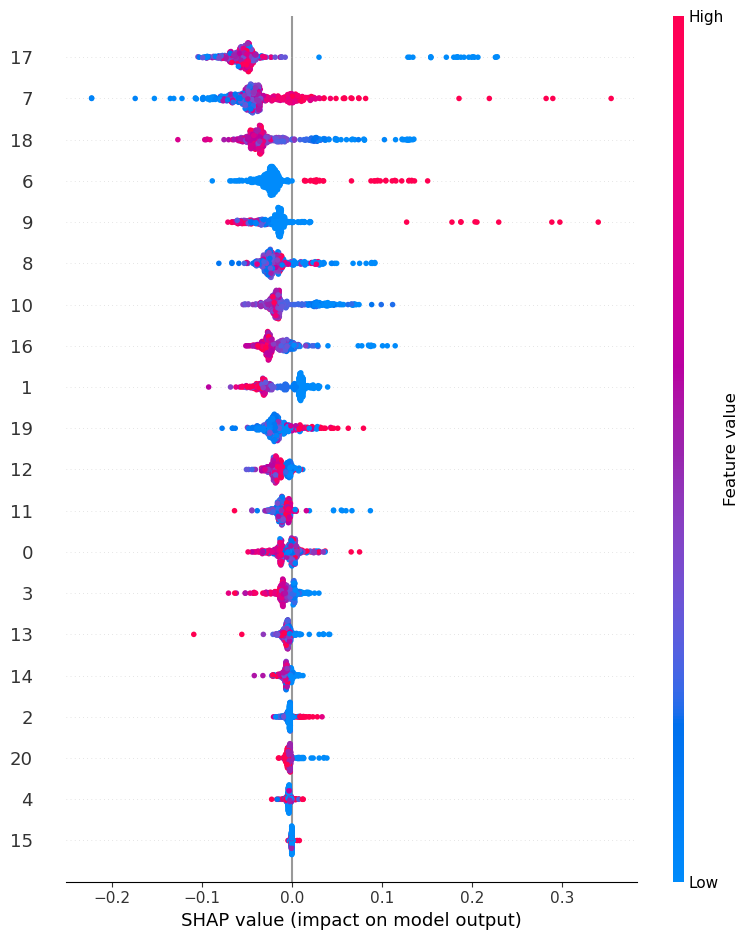

In [10]:
shap.summary_plot(shap_values[class_idx], X_test_transformed, feature_names=list(range(X_train_scaled.shape[1])))

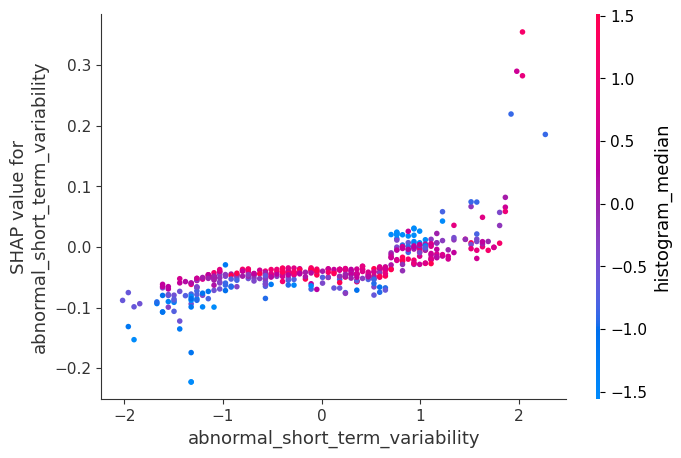

In [11]:
# Choose a specific feature index 
feature_idx = 7

# Create a SHAP dependence plot for the chosen feature
shap.dependence_plot(feature_idx, shap_values[class_idx], X_test_transformed, feature_names=X.columns)